In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plots

In [2]:
dbFile = 'baseline_v1.3_10yrs.db'
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
bundleList = []

metric = metrics.CountMetric(col='observationStartMJD')
slicer = slicers.HealpixSlicer(latCol='altitude', lonCol='azimuth')
sql = 'night < 366'
plotters = [plots.LambertSkyMap()]

bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotFuncs=plotters, plotDict={'norm':'log'}))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Querying database SummaryAllProps with constraint night < 366 for columns ['azimuth', 'observationStartMJD', 'altitude']
Found 225661 visits
Running:  ['opsim_Count_observationStartMJD_night_lt_366_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night < 366" constraint now.
Plotting complete.


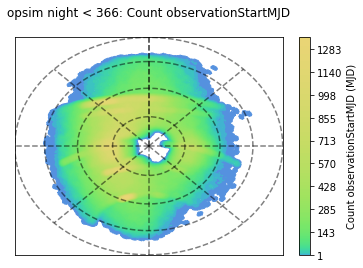

In [4]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)

In [5]:
bundleList = []

metric = metrics.CountMetric(col='observationStartMJD')
slicer = slicers.HealpixSlicer(latCol='altitude', lonCol='azimuth')
sql = 'night < 366'
plotters = [plots.LambertSkyMap()]

bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotFuncs=plotters, plotDict={'norm':None}))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Querying database SummaryAllProps with constraint night < 366 for columns ['azimuth', 'observationStartMJD', 'altitude']
Found 225661 visits
Running:  ['opsim_Count_observationStartMJD_night_lt_366_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night < 366" constraint now.
Plotting complete.


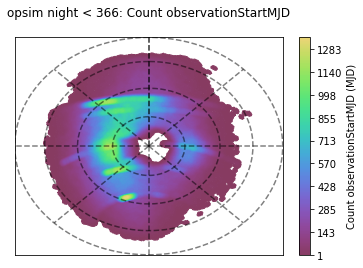

In [6]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)